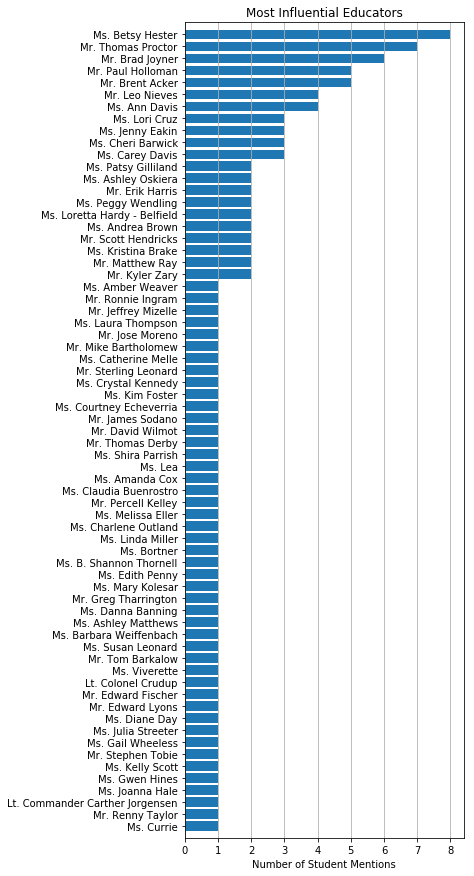

In [3]:
# %load eoe_nrms.py
#!/usr/bin/env python3
"""
Created on Sun Feb 18 18:57:44 2018

@author: BenChen
"""

def main():

    import PyPDF2
    import pylab
    
    def get_words(pageData, page):
        return pageData[page].extractText().split()
    
    def get_name(page_words):
        
        name = []
        
        i = 2
        
        while (page_words[i] != "Nash" and 
                page_words[i] != "Nash-Rocky" and
                page_words[i] != "Northern" and
                page_words[i] != "Rocky" and
                page_words[i] != "Southern"):
            
            name.append(page_words[i])
            i += 1
        
        return " ".join(name)
    
    def get_occupation(page_words):
        pass
    
    def get_college(page_words):
        pass
    
#    def get_educator(page_words):
#        
#        name = []
#        educator = []
#        educators = []
#        
#        i = len(page_words) - 1
#        
#        while (page_words[i] != "Educator:" or page_words[i] != "Educator:") and i > 0:
#            
#            if page_words[i] == "Educators:":
#                for word in name:
#                    if word != "and":
#                        educator.append(word)
#                    else:
#                        educators.append(" ".join(educator[::-1]))
#                        educator.clear()
#                educators.append(" ".join(educator[::-1]))
#                return educators
#            
#            name.append(page_words[i])
#            i -= 1
#        
#        return [" ".join(name[::-1])]
    
    def get_educator(page_words):
        
        name = []
        educator = []
        educators = []
        
        i = len(page_words) - 1
        
        while (page_words[i] != "Educator:" and page_words[i] != "Educators:") and i > 0:
            
            name.append(page_words[i])
            i -= 1
            
        for word in range(len(name)):
            if name[word] == "and" or word == len(name) - 1:
                
                if word == len(name) - 1:
                    educator.append(name[word])
                
                if educator[-1] == "Mrs.":
                    educator[-1] = "Ms."
                educators.append(" ".join(educator[::-1]))
                educator.clear()
            elif name[word] != "and":
                educator.append(name[word])

        return educators
    
    def retrieve_data(obj):
        pdfObj = open(obj, "rb")
        pdfReader = PyPDF2.PdfFileReader(pdfObj)
    
        pageData = []
        
        for p in range(8, 27):
            pageData.append(pdfReader.getPage(p))
            
        for p in range(28, 32):
            pageData.append(pdfReader.getPage(p))

        for p in range(33, 58):
            pageData.append(pdfReader.getPage(p))
            
        for p in range(59, 99):
            pageData.append(pdfReader.getPage(p))
            
        for p in range(100, 127):
            pageData.append(pdfReader.getPage(p))
            
        for p in range(128, 133):
            pageData.append(pdfReader.getPage(p))
            
        return pageData
    
    def remove_educator_errors(educators_dict):
        educators_dict["Ms. Ann Davis"] += educators_dict["Ms. Anne Davis"]
        educators_dict.pop("Ms. Anne Davis")
        
        educators_dict["Ms. Jenny Eakin"] += (educators_dict["Eakin"] + educators_dict["Ms. Sissy Eakin"])
        educators_dict.pop("Eakin")
        educators_dict.pop("Ms. Sissy Eakin")
        
        educators_dict["Mr. Scott Hendricks"] += educators_dict["Mr. Brian Scott Hendricks"]
        educators_dict.pop("Mr. Brian Scott Hendricks")
        
        educators_dict["Mr. Leo Nieves"] += (educators_dict["Mr. Leonides Nieves, III"] + educators_dict["Mr. Leo Nieves, III"])
        educators_dict.pop("Mr. Leonides Nieves, III")
        educators_dict.pop("Mr. Leo Nieves, III")
        
        educators_dict["Ms. Peggy Wendling"] += educators_dict["Ms. Wendling"]
        educators_dict.pop("Ms. Wendling")
        
        educators_dict["Ms. Cheri Barwick"] += educators_dict["Ms. Barwick"]
        educators_dict.pop("Ms. Barwick")
    
    def sort_pairs(keys_list, values_list):
        
        output_keys = keys_list[:]
        output_values = values_list[:]
        
        current_min_value = values_list[0]
        current_min_index = 0
        
        for i in range(len(output_values)):
            if output_values[i] < current_min_value:
                current_min_value = output_values[i]
                current_min_index = i
        
        output_values[0], output_values[current_min_index] = output_values[current_min_index], output_values[0]
        output_keys[0], output_keys[current_min_index] = output_keys[current_min_index], output_keys[0]
        
        suffixSt = 0
        while suffixSt != len(output_values):
            for i in range(suffixSt, len(output_values)):
                if output_values[i] < output_values[suffixSt]:
                    output_values[suffixSt], output_values[i] = output_values[i], output_values[suffixSt]
                    output_keys[suffixSt], output_keys[i] = output_keys[i], output_keys[suffixSt]
            suffixSt += 1
            
        return [output_keys, output_values]
            
    
    def create_graph():
        
        pageData = retrieve_data("eoe_doc.pdf")
        
        #Attribute dicts
        #names = {}
        #occupations = {}
        #colleges = {}
        educators = {}
        
        axis_list = []
        
        for student in range(len(pageData)):
            for i in range(len(get_educator(get_words(pageData, student)))):
                #print(get_educator(get_words(pageData, student))[i])
                educators[get_educator(get_words(pageData, student))[i]] = educators.get(get_educator(get_words(pageData, student))[i], 0) + 1

        remove_educator_errors(educators)
        
        for n in range(len(educators)):
            axis_list.append(n+1)
            
        sorted_pair = sort_pairs(list(educators.keys()), list(educators.values()))
        
        pylab.figure("educator", figsize=(5,15))
        pylab.barh(axis_list, sorted_pair[1], 0.8, tick_label = sorted_pair[0])
        pylab.title("Most Influential Educators")
        pylab.xlabel("Number of Student Mentions")
        pylab.grid(axis='x')
        pylab.ylim(0, len(educators) + 1)
        pylab.show()
        
        #pylab.plot(x_axis, educators.values())
        #pylab.xticks(x_axis, educators.keys())
        #pylab.show()

        
    def print_page(obj, pageNum):
        pdfObj = open(obj, "rb")
        pdfReader = PyPDF2.PdfFileReader(pdfObj)
    
        pageData = []
        
        for p in range(0, pdfReader.numPages):
            pageData.append(pdfReader.getPage(p))
        
        print(pageData[pageNum - 1].extractText())
        

    #print_page("eoe_doc.pdf", 99)
    create_graph()        
    
if __name__ == "__main__":
    main()